In [ ]:
### IMPORTS
import openmc
import matplotlib.pyplot as plt
import numpy as np
from Subchannel.Channel import Channel

In [ ]:
# GET TALLY
# RUN FROM INL - PROJECTS/MOTHMAN/OPENMC_FISSION_DENSITY
sp = openmc.StatePoint('statepoint.450.h5')
grid_tally = sp.tallies[100000]
# Get F (x*y*z, EnergyBins, 1, 1)
F = grid_tally.get_values().reshape(50,55,55)
M = grid_tally.filters[0]
xgrid = M.mesh.x_grid
ygrid = M.mesh.y_grid
zgrid = M.mesh.z_grid

### From top to bottom - lists the number of HORIZONTAL --- channels in each row
nchannels = [3,11,15,17,19,21,23,23,25,25,25,27,27,27]
nchannels += nchannels[-1::-1]
print(nchannels)
print(sum(nchannels)*2)
len(nchannels)

### AREA RATIOS FOR CHANNELS THAT ARE HORIZONTALLY OPPOSED (FROM TOP TO BOTTOM)
channel_area_ratio_horizontal =     np.array([[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0],
                                              [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0],
                                              [0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0],
                                              [0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0],
                                              [0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0],
                                              [0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0],
                                              [0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0],
                                              [0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0],
                                              [0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0],
                                              [0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0],
                                              [0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0],
                                              [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1],
                                              [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1],
                                              [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1],
                                              [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1],
                                              [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1],
                                              [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1],
                                              [0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0],
                                              [0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0],
                                              [0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0],
                                              [0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0],
                                              [0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0],
                                              [0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0],
                                              [0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0],
                                              [0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0],
                                              [0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0],
                                              [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0],
                                              [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0]])
channel_area_ratio_vertical = np.transpose(channel_area_ratio_horizontal)

class openmc_channel():
  def __init__(self, ch_id: int):
    self.ch_type = None
    self.power = None
    self.ch_id = ch_id

openmc_channel_list = []

### NOW GET POWER DISTRIBUTION IN EACH CHANNEL ###
power_dict = {} # Keys are channel indexes - values will be the axial power distribution.
for z in range(50):
  F_test = F[z,:,:]
  hor_arr = np.array([])
  ### HORIZONTALLY ORIENTED CHANNELS ###
  for ridx, row in enumerate(F_test[0::2, :]):
    this_nchannel = nchannels[ridx]
    middle = 27
    rightmost = 27 + (this_nchannel-1)
    leftmost = 27 - (this_nchannel-1)
    channel_vals = row[int(leftmost):int(rightmost+1):2]
    nzeros = int((27 - this_nchannel)/2)
    zeros = np.zeros(nzeros)

    channel_vals = np.append(zeros,channel_vals)
    channel_vals = np.append(channel_vals, zeros)
    print("ROW",ridx)
    print(channel_vals)
    try:
      hor_arr = np.vstack([hor_arr, channel_vals])
    except:
      hor_arr = channel_vals

  ### VERTICALLY ORIENTED CHANNELS ###
  ver_arr = np.array([])
  for cidx, col in enumerate(np.transpose(F_test)[0::2, :]):
    this_nchannel = nchannels[cidx]
    middle = 27
    rightmost = 27 + (this_nchannel-1)
    leftmost = 27 - (this_nchannel-1)
    channel_vals = col[int(leftmost):int(rightmost+1):2]
    nzeros = int((27 - this_nchannel)/2)
    zeros = np.zeros(nzeros)

    channel_vals = np.append(zeros,channel_vals)
    channel_vals = np.append(channel_vals, zeros)
    print("COL",cidx)
    print(channel_vals)
    try:
      ver_arr = np.vstack([ver_arr, channel_vals])
    except:
      ver_arr = channel_vals
  ver_arr = np.transpose(ver_arr)


  ch_idx = int(0)
  openmc_channel_list = []
  for ridx, row in enumerate(hor_arr):
    for cidx, col in enumerate(row):
      if col > 1e-15:
        try:
          power_dict[ch_idx] = np.append(power_dict[ch_idx], col)
        except:
          power_dict[ch_idx] = np.array([col])
        this_ch = openmc_channel(ch_id=ch_idx)
        this_ch.ch_type = channel_area_ratio_horizontal[ridx, cidx]
        openmc_channel_list.append(this_ch)
        ch_idx += 1
  for ridx, row in enumerate(ver_arr):
    for cidx, col in enumerate(row):
      if col > 1e-15:
        try:
          power_dict[ch_idx] = np.append(power_dict[ch_idx], col)
        except:
          power_dict[ch_idx] = np.array([col])
        this_ch = openmc.channel(ch_id=ch_idx)
        this_ch.ch_type = channel_area_ratio_vertical[ridx,cidx]
        openmc_channel_list.append(this_ch)
        ch_idx += 1

# we now have power dict with powers for each channel. channels 1-~500 are horizontally opposed channels and ~500-1152
# are vertically oriented channels.




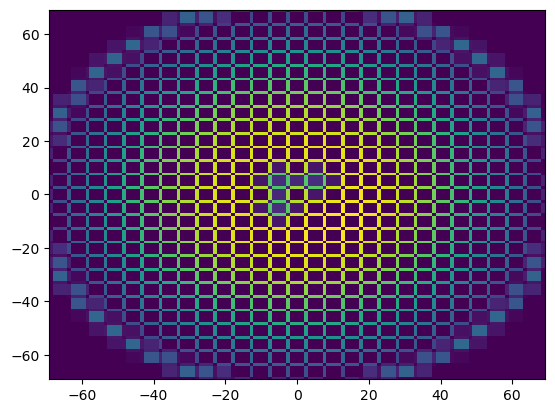

In [24]:
plt.figure(dpi=100)
plt.pcolormesh(xgrid, ygrid, F[24,:,:])


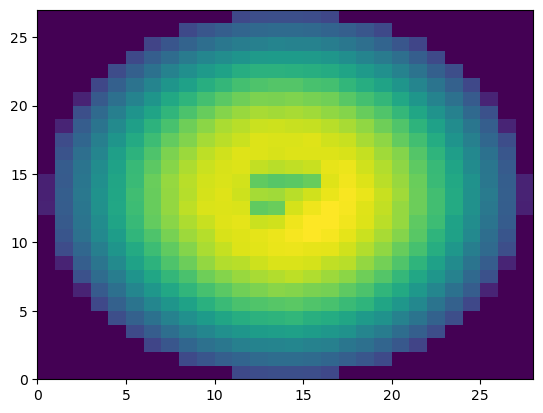

In [25]:
# plt.figure(dpi=400)
plt.pcolormesh(ver_arr)

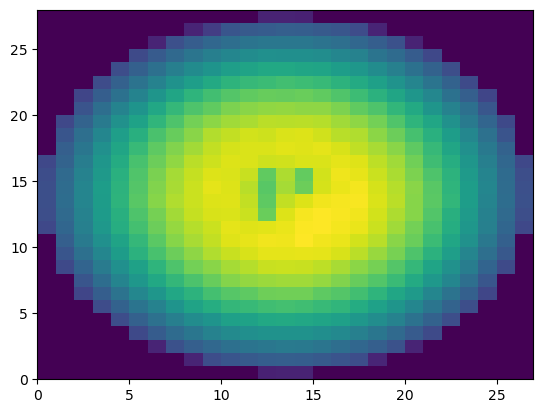

In [26]:
plt.pcolormesh(hor_arr)

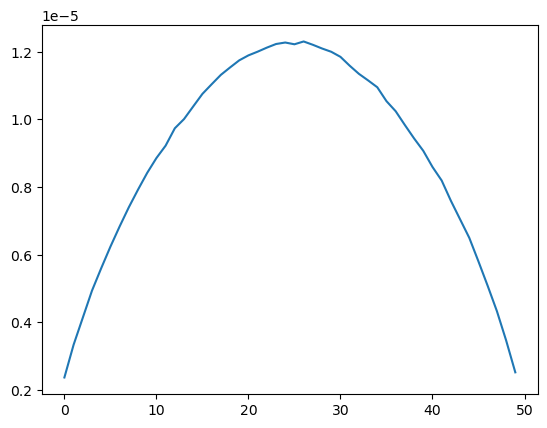

In [27]:
plt.plot(power_dict[200])
# plt.ylim([0,6.2e-6])

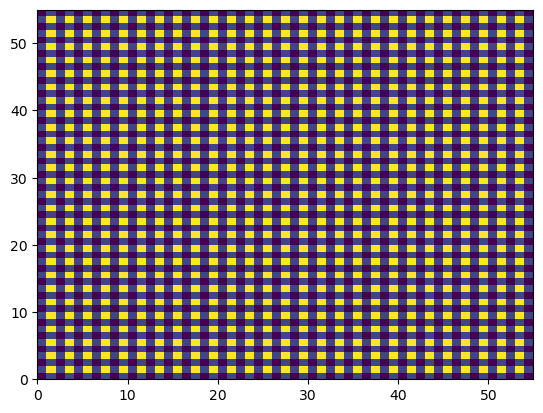

In [28]:
plt.figure(dpi=100)
plt.pcolormesh(M.mesh.volumes[:,:,0])